# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [6]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [7]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [8]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400 records

#### Question 2. Create a summary table

In [9]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because students can score anywhere between 130 to 170 points on any section in the example. Cumulatively, that creates a large range of potential scores. Meanwhile, the range of GPAs is between 0.0 and 4.0 (in most cases).

#### Question 4. Drop data points with missing data


In [18]:
df_raw.dropna()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: The output in the question above tells us there are now 397 rows, which is 3 rows short from before.

In [19]:
print df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64


#### Question 6. Create box plots for GRE and GPA

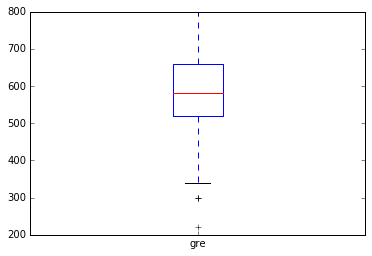

In [22]:
df_raw['gre'].plot(kind="box")

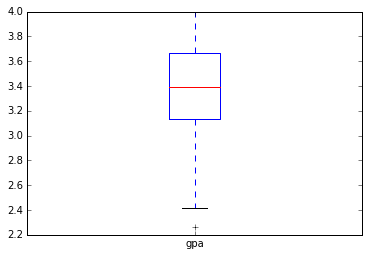

In [23]:
df_raw['gpa'].plot(kind="box")

#### Question 7. What do these plots show?

Answer: the data is skewed. for both data series, there are a large amount of data points that fall below the 25% quartile.

#### Question 8. Describe each distribution 

In [28]:
df_raw.min()

admit         0.00
gre         220.00
gpa           2.26
prestige      1.00
dtype: float64

In [29]:
df_raw.max()

admit         1.0
gre         800.0
gpa           4.0
prestige      4.0
dtype: float64

In [30]:
df_raw.mean()

admit         0.317500
gre         588.040201
gpa           3.390930
prestige      2.486216
dtype: float64

In [33]:
df_raw.median()

admit         0.000
gre         580.000
gpa           3.395
prestige      2.000
dtype: float64

In [32]:
df_raw.mode()

,admit,gre,gpa,prestige
0,0,620.0,4.0,2.0


In [34]:
df_raw.var()

admit           0.217237
gre         13369.953040
gpa             0.144879
prestige        0.893654
dtype: float64

In [36]:
df_raw.std()

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64

In [37]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: We would meet that requirement for GPA, where the mean and Median are about the same. But not for GRE, where the median is less than the mean, and the distribution is positively skewed.

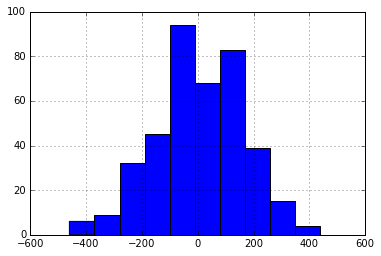

In [40]:
df_raw['gre'].diff().hist()

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: I'm not sure what you mean by correction. But if the mean and median lined up (equaled) then the distribution would be normal. Right now, GRE results are skewed due to outliers.

#### Question 11. Which of our variables are potentially colinear? 

In [38]:
# create a correlation matrix for the data
df_raw.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


#### Question 12. What did you find?

Answer: There doesn't seem to be a correlation between any of the variables (admittance, gre score, gpa, and prestige). at the most, GRE and GPA had a .38 correlation, which is still relatively low. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Is there an association between grad school admissions rates and prestige of undergrad schools? I can start with some questions:
How strong is that relationship right now?
Which undergrad schools (particularly IVYs) have high rates of grad school admittance?
What is the effect of each undergrad school type (public, private, Ivy) on grad school admittance?

#### Question 14. What is your hypothesis? 

Answer: Null hypothesis: there is no correlnation between grad school admittance rates and prestige of undergrad schools.
Alternative hypothesis: there is no correlnation between grad school admittance rates and prestige of undergrad schools (and β1 is not equal to zero).

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data